In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import glob
import numpy as np
from typing import Callable
from cycler import cycler

PROJ_DIR = os.environ.get("PROJ_DIR", "")
if PROJ_DIR == "":
    raise EnvironmentError("PROJ_DIR not set")
if not os.path.exists(PROJ_DIR):
    raise FileNotFoundError(f"Project dir not found: {PROJ_DIR}")

LOGS_DIR = f"{PROJ_DIR}/logs"
PLOTS_DIR = f"{PROJ_DIR}/plots/cdf"
os.makedirs(PLOTS_DIR, exist_ok=True)

In [5]:
def read_data(filename: str, column_name: str | None = None, series_process_func: Callable | None = None) -> dict[str, pd.Series]:
    if column_name is None and series_process_func is None:
        raise ValueError("Either column_name or series_process_func must be provided")
    files = glob.glob(f"{LOGS_DIR}/**/{filename}", recursive=True)
    files.sort(reverse=True)
    data_dict = {}
    for file in files:
        print(f"Reading '{file.removeprefix(PROJ_DIR+"/")}'")
        df_service = pd.read_csv(file, low_memory=False)
        dist = float(file.split("dist")[0].split("/")[-1])
        migr = float(file.split("migr")[0].split("-")[-1])
        if series_process_func is not None:
            data_dict[f"Dist {dist} Migr {migr}"] = series_process_func(df_service)
        else:
            data_dict[f"Dist {dist} Migr {migr}"] = df_service[column_name].sort_values()
    return data_dict

In [ ]:
def plot_cdfs(
    data_dict: dict[str, pd.Series],
    xlabel: str,
    ylabel="Probability of occurrence",
    title: str | None = None,
    save_path: str | None = None,
    figsize=(12, 8),
    n_bins=25,
    show_hist=False,
):
    if title is None:
        title = f"CDFs of {xlabel}"
    if save_path is None:
        save_path = title.lower().replace(" ", "_")
        save_path = f"{PLOTS_DIR}/{save_path}.png"
    print(f"Plotting CDFs of {len(data_dict)} datasets")
    default_cycler = (
        cycler(
            color=[
                "tab:blue",
                "tab:red",
                "tab:green",
                "tab:purple",
                "tab:pink",
                "tab:brown",
                "tab:orange",
                "tab:gray",
                "tab:olive",
                "tab:cyan",
            ]
        )
    ) * (cycler(linestyle=["-", "--", ":", "-."]))
    plt.figure(figsize=figsize, layout="constrained")
    plt.rc("axes", prop_cycle=default_cycler)
    plt.style.use("ggplot")
    for name, data in data_dict.items():
        print(f"Plotting CDF curve for {name}")
        plt.ecdf(data, label=f"CDF {name}")
        if show_hist:
            plt.hist(data, n_bins, density=True, histtype="step", cumulative=True, label=f"Cumulative histogram {name}")
    print("Plotting CDF curve for normal distribution")
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend()
    plt.grid(True)
    print(f"Saving plot to {save_path.removeprefix(PROJ_DIR+"/")}")
    plt.savefig(save_path)

Reading 'logs/0.8dist-8migr-2160steps/2024-11-27_00-54-03/Service.csv'
Reading 'logs/0.8dist-64migr-2160steps/2024-11-28_21-06-53/Service.csv'
Reading 'logs/0.8dist-32migr-2160steps/2024-11-28_21-06-53/Service.csv'
Reading 'logs/0.8dist-16migr-2160steps/2024-11-28_21-06-53/Service.csv'
Reading 'logs/0.6dist-8migr-2160steps/2024-11-28_01-01-45/Service.csv'
Reading 'logs/0.6dist-64migr-2160steps/2024-11-28_21-06-53/Service.csv'
Reading 'logs/0.6dist-32migr-2160steps/2024-11-28_21-06-53/Service.csv'
Reading 'logs/0.6dist-16migr-2160steps/2024-11-28_21-06-53/Service.csv'
Reading 'logs/0.4dist-8migr-2160steps/2024-11-28_01-06-10/Service.csv'
Reading 'logs/0.4dist-64migr-2160steps/2024-11-28_21-06-53/Service.csv'
Reading 'logs/0.4dist-32migr-2160steps/2024-11-28_21-06-53/Service.csv'
Reading 'logs/0.4dist-16migr-2160steps/2024-11-28_21-06-53/Service.csv'
Reading 'logs/0.2dist-8migr-2160steps/2024-11-28_01-07-39/Service.csv'
Plotting CDFs of 13 datasets
Plotting CDF curve for Dist 0.8 Migr 8.

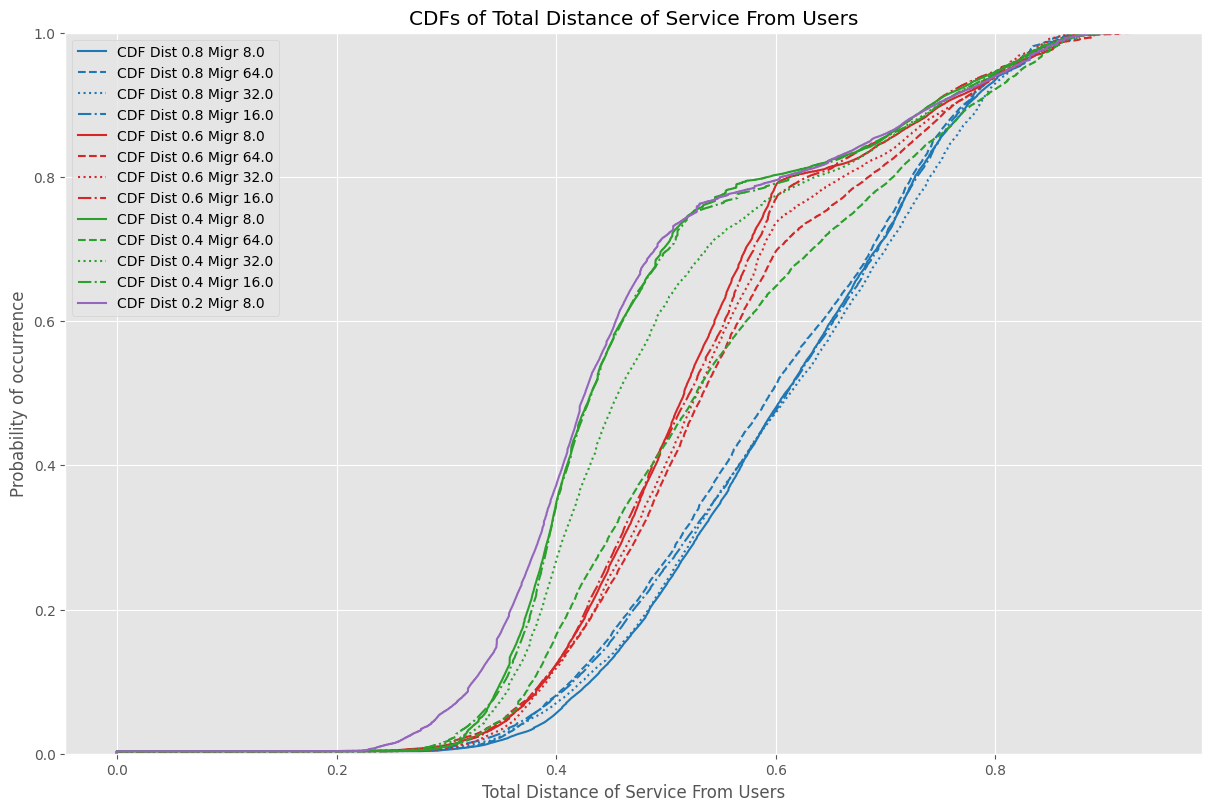

In [4]:
plot_cdfs(
    data_dict=read_data("Service.csv", "Total Distance From Users"),
    xlabel="Total Distance of Service From Users",
)

Reading 'logs/0.2dist-8migr-2160steps/2024-11-28_01-07-39/EdgeServer.csv'...Done
Reading 'logs/0.4dist-16migr-2160steps/2024-11-28_21-06-53/EdgeServer.csv'...Done
Reading 'logs/0.4dist-32migr-2160steps/2024-11-28_21-06-53/EdgeServer.csv'...Done
Reading 'logs/0.4dist-64migr-2160steps/2024-11-28_21-06-53/EdgeServer.csv'...Done
Reading 'logs/0.4dist-8migr-2160steps/2024-11-28_01-06-10/EdgeServer.csv'...Done
Reading 'logs/0.6dist-16migr-2160steps/2024-11-28_21-06-53/EdgeServer.csv'...Done
Reading 'logs/0.6dist-32migr-2160steps/2024-11-28_21-06-53/EdgeServer.csv'...Done
Reading 'logs/0.6dist-64migr-2160steps/2024-11-28_21-06-53/EdgeServer.csv'...Done
Reading 'logs/0.6dist-8migr-2160steps/2024-11-28_01-01-45/EdgeServer.csv'...Done
Reading 'logs/0.8dist-16migr-2160steps/2024-11-28_21-06-53/EdgeServer.csv'...Done
Reading 'logs/0.8dist-32migr-2160steps/2024-11-28_21-06-53/EdgeServer.csv'...Done
Reading 'logs/0.8dist-64migr-2160steps/2024-11-28_21-06-53/EdgeServer.csv'...Done
Reading 'logs/0.8di

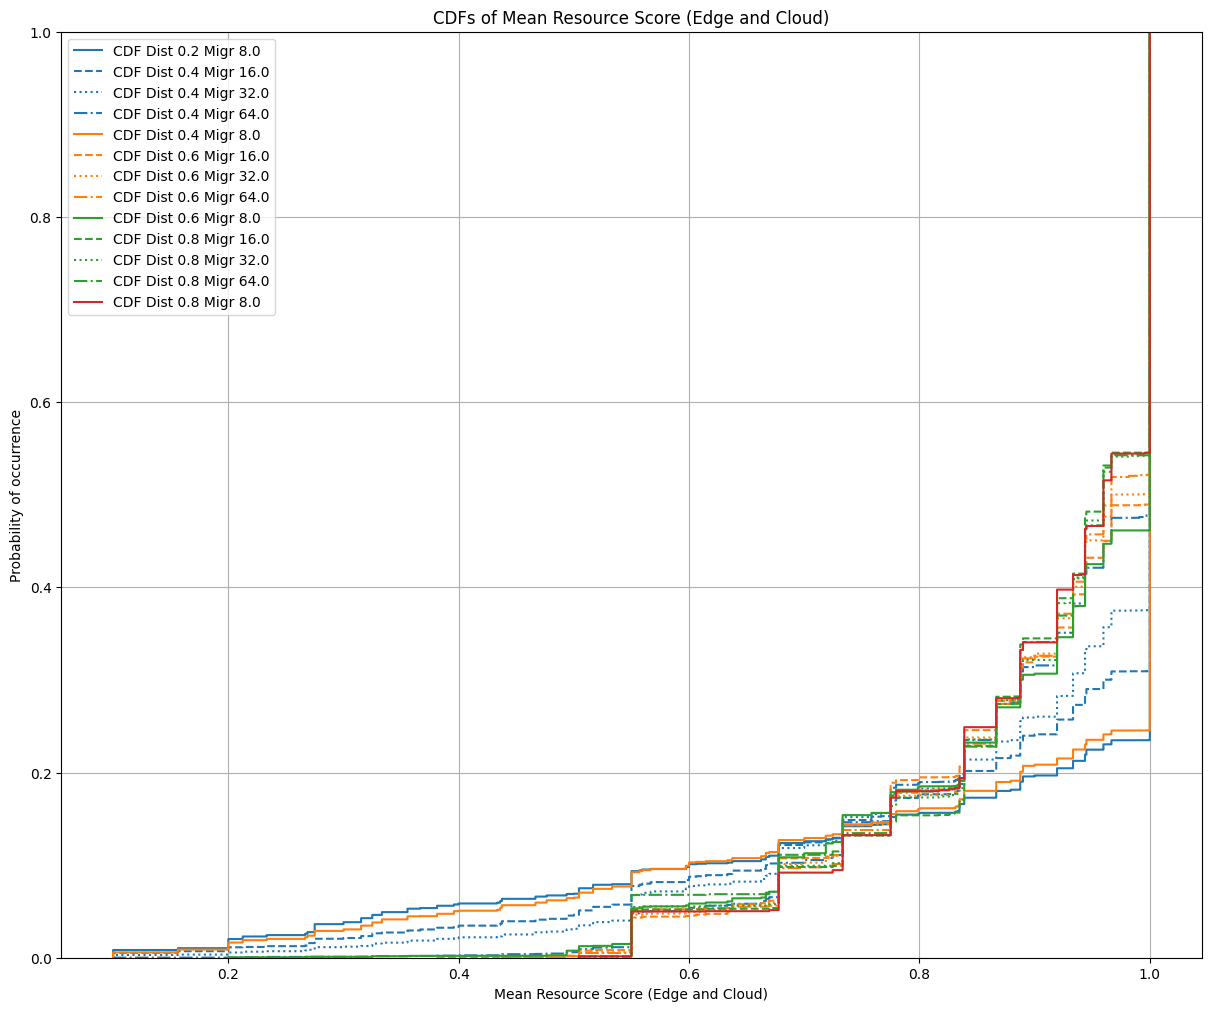

In [9]:
plot_cdfs(
    data_dict=read_data("EdgeServer.csv", "Resources Score"),
    xlabel="Mean Resource Score (Edge and Cloud)",
    figsize=(12, 10),
)

Reading 'logs/0.8dist-8migr-2160steps/2024-11-27_00-54-03/User.csv'...

Done
Reading 'logs/0.8dist-64migr-2160steps/2024-11-28_21-06-53/User.csv'...Done
Reading 'logs/0.8dist-32migr-2160steps/2024-11-28_21-06-53/User.csv'...Done
Reading 'logs/0.8dist-16migr-2160steps/2024-11-28_21-06-53/User.csv'...Done
Reading 'logs/0.6dist-8migr-2160steps/2024-11-28_01-01-45/User.csv'...Done
Reading 'logs/0.6dist-64migr-2160steps/2024-11-28_21-06-53/User.csv'...Done
Reading 'logs/0.6dist-32migr-2160steps/2024-11-28_21-06-53/User.csv'...Done
Reading 'logs/0.6dist-16migr-2160steps/2024-11-28_21-06-53/User.csv'...Done
Reading 'logs/0.4dist-8migr-2160steps/2024-11-28_01-06-10/User.csv'...Done
Reading 'logs/0.4dist-64migr-2160steps/2024-11-28_21-06-53/User.csv'...Done
Reading 'logs/0.4dist-32migr-2160steps/2024-11-28_21-06-53/User.csv'...Done
Reading 'logs/0.4dist-16migr-2160steps/2024-11-28_21-06-53/User.csv'...Done
Reading 'logs/0.2dist-8migr-2160steps/2024-11-28_01-07-39/User.csv'...Done
Plotting CDFs of 13 datasets
Plotting CDF curve for Dist 0.8 Migr 8.0
Plotting CDF cur

/tmp/ipykernel_641690/979320921.py:47: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(save_path)
/home/albuquerque/espy-user-mobility/.venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


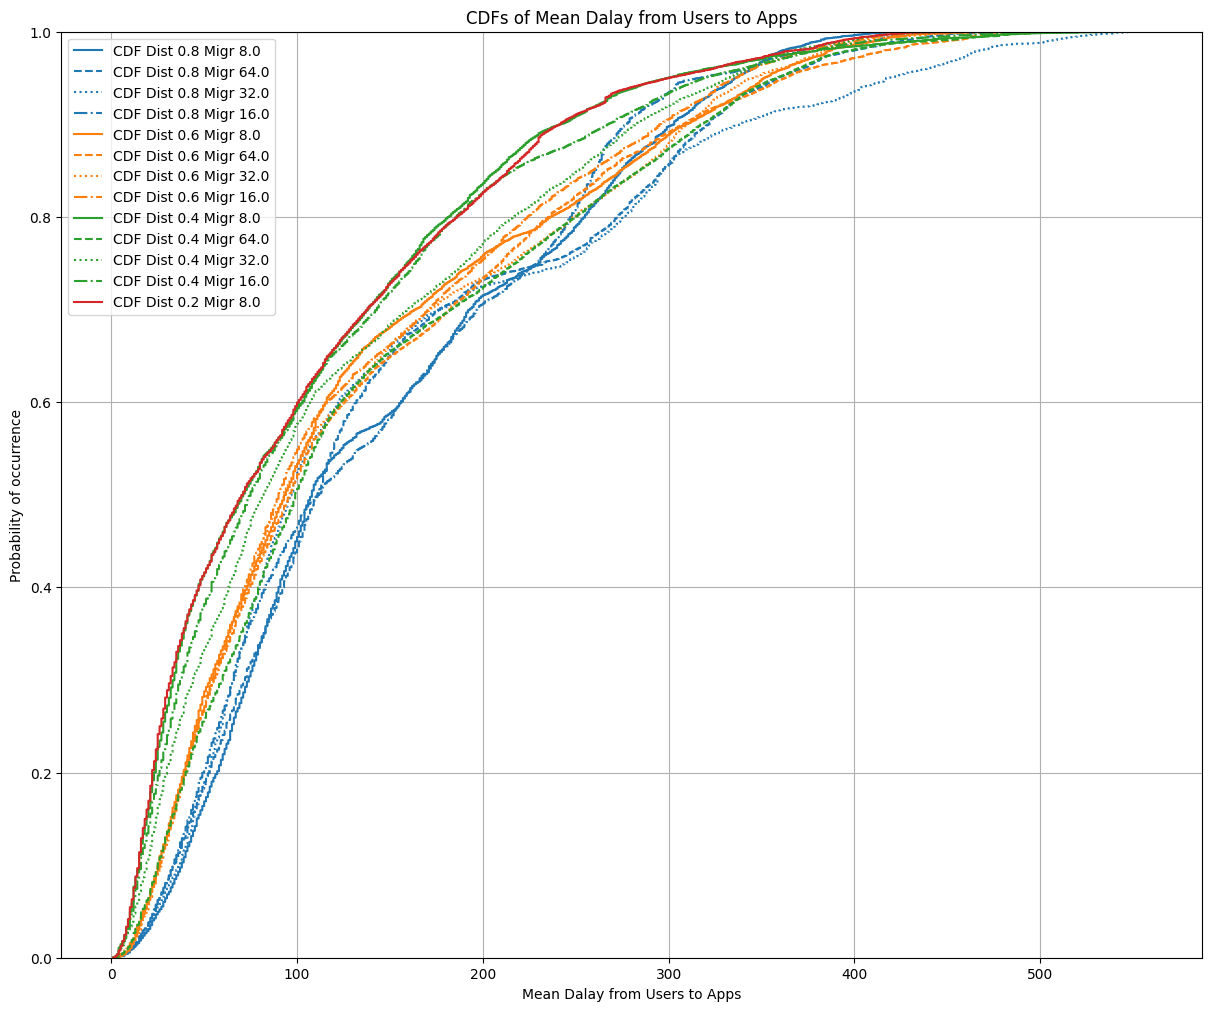

In [ ]:
def process_user_df(df: pd.DataFrame) -> pd.Series:
    def mean_delay_for_all_keys(delays: dict | str | None) -> float:
        if isinstance(delays, str):
            delays = delays.replace("inf", "float('inf')")  # type: ignore
            delays = eval(delays)  # type: ignore
        if delays is None or len(delays) == 0:
            return np.nan
        return float(np.mean([delay for _, delay in delays.items()]))  # type: ignore

    return df["Delays"].apply(mean_delay_for_all_keys).replace([np.inf, -np.inf], np.nan).dropna()


plot_cdfs(
    data_dict=read_data("User.csv", "Delays", process_user_df),
    xlabel="Mean Dalay from Users to Apps",
    figsize=(12, 10),
)